In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('kredit.csv')

df.drop(df.columns[0], axis=1, inplace=True)
df.describe()
#MonthlyIncome and NumberOfDependents have missing values, there is a 0 in ages.
df.age.plot.box()

#replace 0 age with median

def replaceValuesWithMedian(data, values = []):
    med = np.median(data)
    return pd.Series(map(lambda val: med if val in values else val, data))

df['age'] = replaceValuesWithMedian(df['age'],[0])
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295553,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771249,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Class balance:
93.316 %
6.683999999999999 %


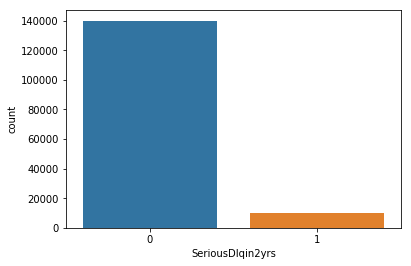

In [2]:
#outcome variable mean is 0.066, not a good sign
plot = sns.countplot(x=df['SeriousDlqin2yrs'])
#here we see that we have a class disbalance problem
print('Class balance:')
for bin in plot.patches:
    print(bin.get_bbox().get_points()[1,1]/len(df)*100, '%')


In [3]:
#notice the strange value 98 appearing as max in data description for all of 3 NumberOfTime... variables
np.unique(df['NumberOfTime30-59DaysPastDueNotWorse'])
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [4]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [5]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [6]:
#replace 98 and 96 with median
df['NumberOfTime30-59DaysPastDueNotWorse'] = replaceValuesWithMedian(df['NumberOfTime30-59DaysPastDueNotWorse'],[96,98])
df['NumberOfTimes90DaysLate'] = replaceValuesWithMedian(df['NumberOfTimes90DaysLate'],[96,98])
df['NumberOfTime60-89DaysPastDueNotWorse'] = replaceValuesWithMedian(df['NumberOfTime60-89DaysPastDueNotWorse'],[96,98])

In [7]:
#MonthlyIncome and NumberOfDependents have missing values(their count is not 150000 in data description)
#replace NA's with median
fill_values = {}
for i in [5,10]:
    fill_values[df.columns[i]] = np.nanmedian(df[df.columns[i]])
df.fillna(fill_values, inplace=True)

df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295553,0.245353,353.005076,6.418455e+03,8.452760,0.090293,1.018240,0.064707,0.737413
std,0.249746,249.755371,14.771249,0.697231,2037.818523,1.289040e+04,5.145951,0.485107,1.129771,0.329788,1.107021
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [8]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7,0.0,1,0.0,0.0


RevolvingUtilizationOfUnsecuredLines


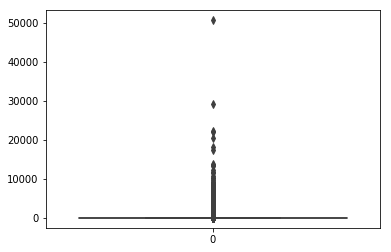

In [9]:
#visualize numeric variables
print(df.columns[1])
sns.boxplot(data=df[df.columns[1]])

DebtRatio


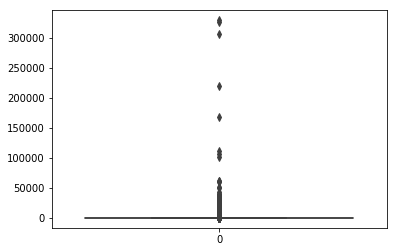

In [10]:
print(df.columns[4])
sns.boxplot(data=df[df.columns[4]])

MonthlyIncome


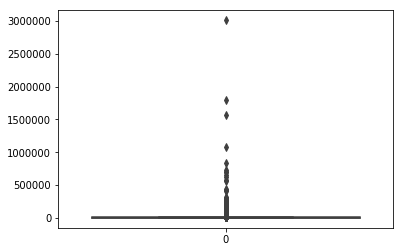

In [11]:
print(df.columns[5])
sns.boxplot(data=df[df.columns[5]])

In [12]:
#we see that numerics have some upper outliers, see how many are there and remove them
#take 4*standard deviation for limit
for i in [1,4,5]:
    print(df.columns[i],len(df[~(np.abs(df[df.columns[i]]-df[df.columns[i]].mean())<=(4*df[df.columns[i]].std()))]))
    df = df[np.abs(df[df.columns[i]]-df[df.columns[i]].mean())<=(i*df[df.columns[i]].std())]

RevolvingUtilizationOfUnsecuredLines 172
DebtRatio 281
MonthlyIncome 237


RevolvingUtilizationOfUnsecuredLines


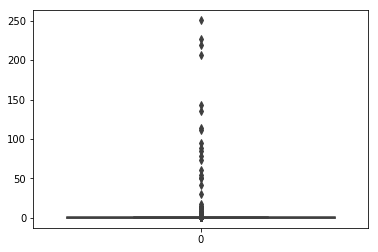

In [13]:
print(df.columns[1])
sns.boxplot(data=df[df.columns[1]])

DebtRatio


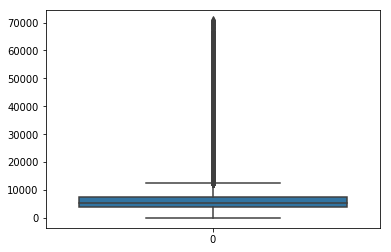

In [14]:
print(df.columns[4])
sns.boxplot(data=df[df.columns[5]])

MonthlyIncome


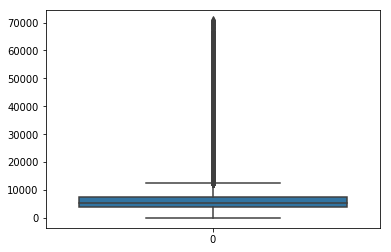

In [15]:
print(df.columns[5])
sns.boxplot(data=df[df.columns[5]])

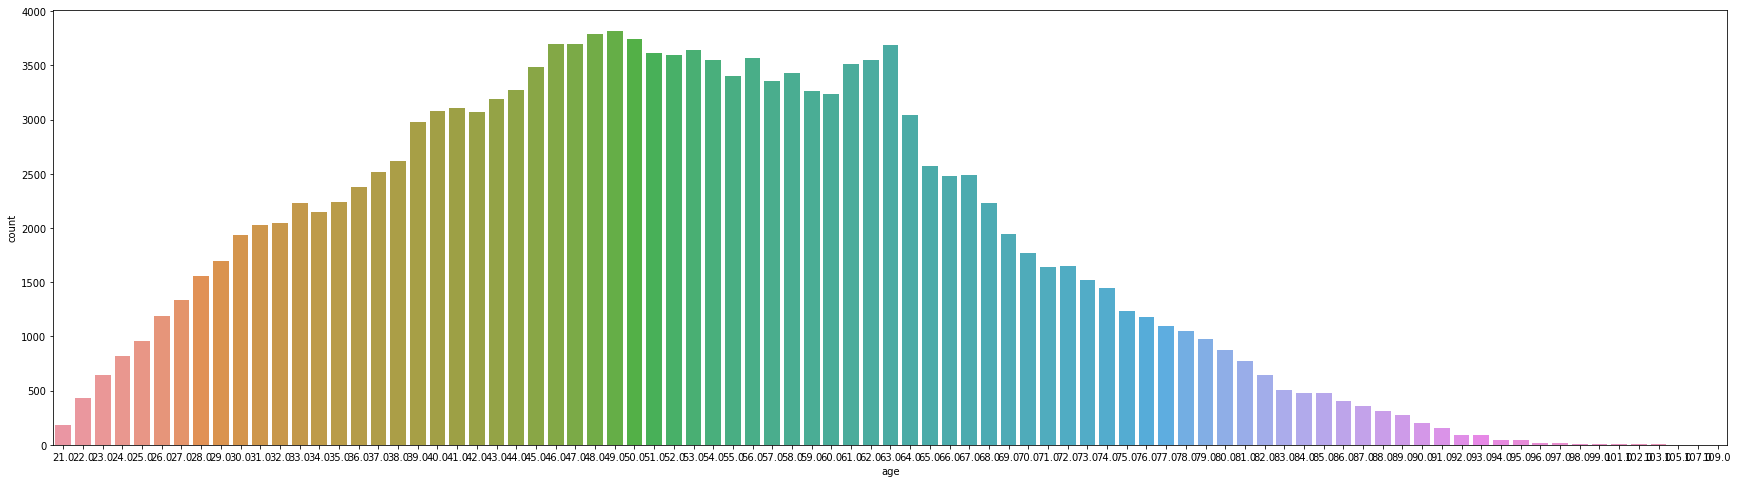

In [16]:
#visualize categoric variables
import matplotlib.pyplot as plt
categoric = [2,3,6,7,8,9,10]
_, axes = plt.subplots(1, 1, figsize=(30, 8))
sns.countplot(x=df.columns[2], data=df)

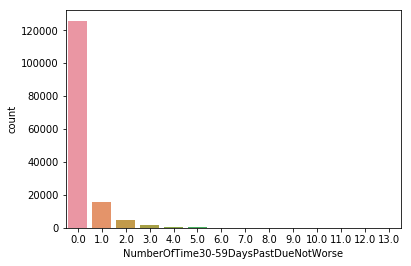

In [17]:
sns.countplot(x=df.columns[3], data=df)

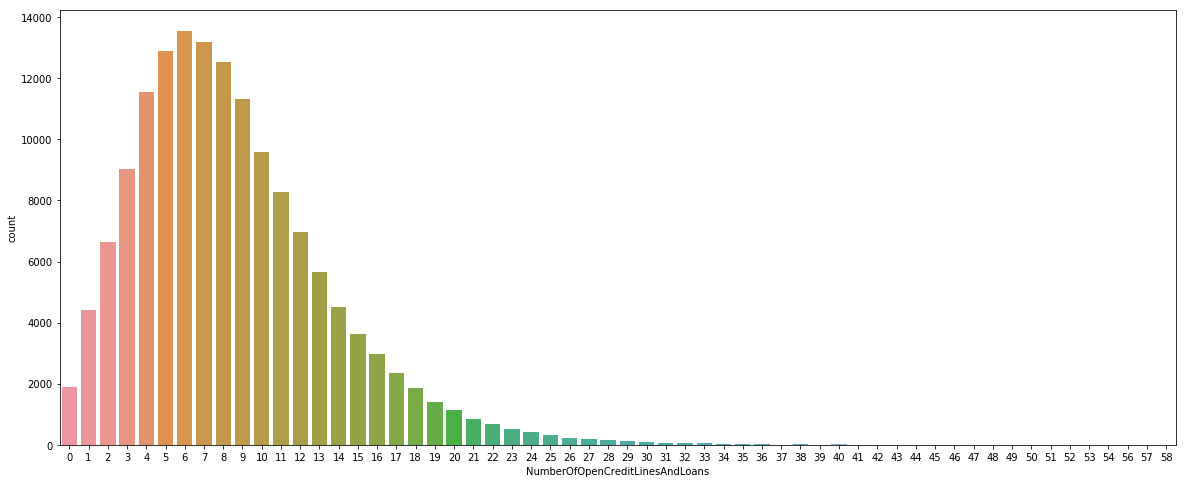

In [18]:
_, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x=df.columns[6], data=df)

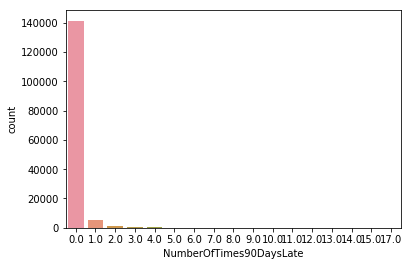

In [19]:
sns.countplot(x=df.columns[7], data=df)

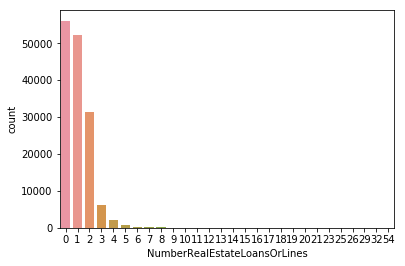

In [20]:
sns.countplot(x=df.columns[8], data=df)

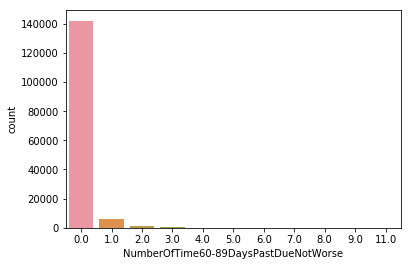

In [21]:
sns.countplot(x=df.columns[9], data=df)

0.0     90414
1.0     26216
2.0     19434
3.0      9445
4.0      2849
5.0       744
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

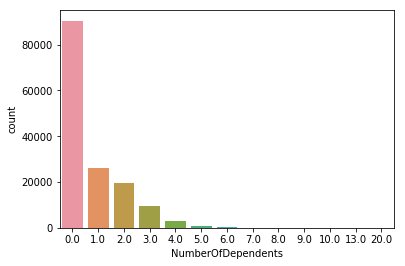

In [22]:
sns.countplot(x=df.columns[10], data=df)
df['NumberOfDependents'].value_counts()

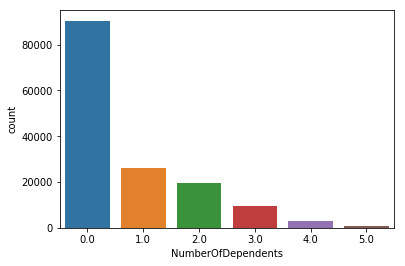

In [23]:
#generally speaking, categoric variables are ok
#maybe we can remove those with more than 5 dependents
df = df[df['NumberOfDependents'] <= 5]
df['NumberOfDependents'].value_counts()
sns.countplot(x=df.columns[10], data=df)

In [24]:
print('We now have', len(df), 'rows, which means we deleted',150000 - len(df), 'rows, which is', (150000-len(df))/150000, '%. Not much.')

We now have 149102 rows, which means we deleted 898 rows, which is 0.005986666666666667 %. Not much.


age is not affecting the outcome too much since the plots are nearly the same,
 but we need to keep in mind that we have class imbalance


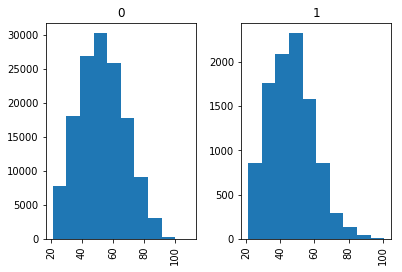

In [25]:
#Lets see how our categoric variables behave with respect to the outcome
df[df.columns[2]].hist(by=df['SeriousDlqin2yrs'])
print(df.columns[2], 'is not affecting the outcome too much since the plots are nearly the same,\n',
     'but we need to keep in mind that we have class imbalance')

NumberOfTime30-59DaysPastDueNotWorse


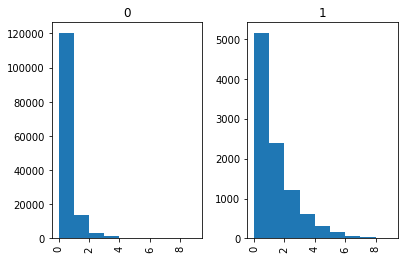

In [26]:
df[df.columns[3]].hist(by=df['SeriousDlqin2yrs'],bins=range(0,10))
print(df.columns[3])

NumberOfOpenCreditLinesAndLoans


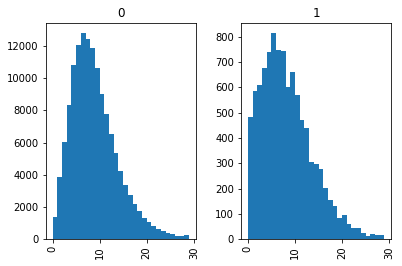

In [27]:
df[df.columns[6]].hist(by=df['SeriousDlqin2yrs'], bins=range(0,30))
print(df.columns[6])

NumberOfTimes90DaysLate


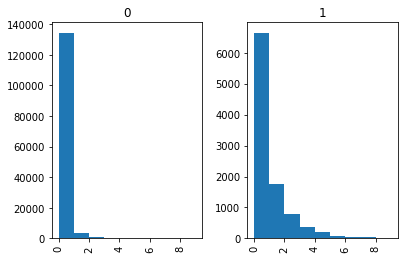

In [28]:
df[df.columns[7]].hist(by=df['SeriousDlqin2yrs'], bins=range(0,10))
print(df.columns[7])

NumberRealEstateLoansOrLines


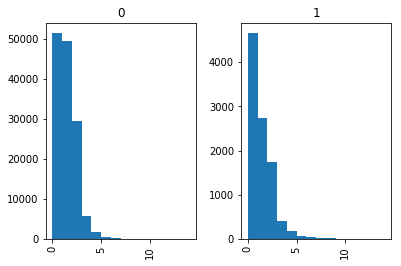

In [29]:
df[df.columns[8]].hist(by=df['SeriousDlqin2yrs'], bins=range(0,15))
print(df.columns[8])

NumberOfTime60-89DaysPastDueNotWorse


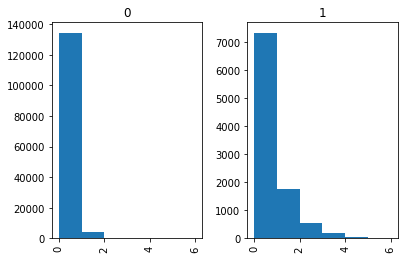

In [30]:
df[df.columns[9]].hist(by=df['SeriousDlqin2yrs'], bins=range(0,7))
print(df.columns[9])

NumberOfDependents


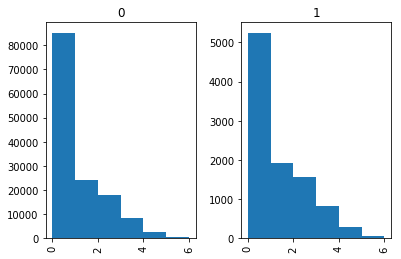

In [31]:
df[df.columns[10]].hist(by=df['SeriousDlqin2yrs'],bins=range(0,7))
print(df.columns[10])

We can say that generally deliquent people had more difficulties paying their debts, more dependents and more credit lines. That was expected.

In [32]:
#sns.violinplot(x=df.columns[0], y=df.columns[1], data=df)

In [33]:
#sns.violinplot(x=df.columns[0], y=df.columns[4], data=df)

In [34]:
#sns.violinplot(x=df.columns[0], y=df.columns[5], data=df)

In [35]:
#Lets see the correlation between columns
def correlation(data, method='pearson',top=10):
    """Calculates the correlation coefficients between columns.
    Displays them in descending order of their absolute values."""
    columns = list(data)
    coefficients = data.astype(float).corr(method=method)
    results = []
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            coefficient = coefficients[columns[i]][columns[j]]
            results.append((
                abs(coefficient), coefficient,
                columns[i] + ' - ' + columns[j]))
    print('METHOD:', method,', TOP', top)
    for result in list(reversed(sorted(results)))[:top]:
        abs_coefficient, coefficient, columns_pair = result
        print (coefficient, columns_pair)
        
correlation(df,'pearson',10)
correlation(df,'spearman',10)

METHOD: pearson , TOP 10
0.43307405909281743 NumberOfOpenCreditLinesAndLoans - NumberRealEstateLoansOrLines
0.31513512241750974 MonthlyIncome - NumberRealEstateLoansOrLines
0.31159465101130523 SeriousDlqin2yrs - NumberOfTimes90DaysLate
0.3060145829804228 NumberOfTime30-59DaysPastDueNotWorse - NumberOfTime60-89DaysPastDueNotWorse
0.29465778861787384 NumberOfTimes90DaysLate - NumberOfTime60-89DaysPastDueNotWorse
0.2706425219727398 SeriousDlqin2yrs - NumberOfTime30-59DaysPastDueNotWorse
0.26523223470981055 SeriousDlqin2yrs - NumberOfTime60-89DaysPastDueNotWorse
0.23236597937491046 MonthlyIncome - NumberOfOpenCreditLinesAndLoans
0.2183845970480379 NumberOfTime30-59DaysPastDueNotWorse - NumberOfTimes90DaysLate
-0.2183270107954695 age - NumberOfDependents
METHOD: spearman , TOP 10
0.47205178322882424 NumberOfOpenCreditLinesAndLoans - NumberRealEstateLoansOrLines
0.39886976652193795 DebtRatio - NumberRealEstateLoansOrLines
0.3477266618057114 MonthlyIncome - NumberRealEstateLoansOrLines
0.3318

In [36]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000,149102.000000
mean,0.066713,0.337401,52.297414,0.245060,317.365003,6220.245631,8.443334,0.090435,1.010946,0.064748,0.727925
std,0.249525,1.507817,14.786549,0.696924,942.248543,4465.381742,5.137266,0.485776,1.112477,0.329958,1.080696
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029735,41.000000,0.000000,0.175208,3900.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153343,52.000000,0.000000,0.366227,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556142,63.000000,0.000000,0.861201,7370.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,250.583333,109.000000,13.000000,8501.000000,70833.000000,58.000000,17.000000,54.000000,11.000000,5.000000


In [37]:
from sklearn.metrics import roc_auc_score,recall_score,accuracy_score
from sklearn import linear_model, tree, svm, naive_bayes, neighbors
from sklearn import model_selection

def predict(x_train, y_train, x_test, model):
    """Predicts the probability of serious delinquency."""
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    y_predict[y_predict < 0.5] = 0
    y_predict[y_predict >= 0.5] = 1
    return y_predict

def score_strat_k_fold(x, y, model):
    """
    Estimates the area under ROC curve and recall of a model,
    using stratified K-fold CV.
    """
    # Use k-fold cross-validation and average the scores.
    kfold = model_selection.StratifiedKFold(n_splits=5)
    auc_scores = []
    recall_scores = []
    acc_scores = []
    for train_index, test_index in kfold.split(x,y):
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        pred = predict(x_train, y_train, x_test, model)
        auc_score = roc_auc_score(y_test, pred)
        auc_scores.append(auc_score)
        recall_scores.append(recall_score(y_test,pred))
        acc_scores.append(accuracy_score(y_test,pred))
        
    auc = np.mean(auc_scores)
    recall = np.mean(recall_scores)
    acc = np.mean(acc_scores)
    return auc,recall,acc


    
simpleModels = [linear_model.LogisticRegression(),tree.DecisionTreeClassifier(),naive_bayes.GaussianNB(),neighbors.KNeighborsClassifier()]

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

def print_metrics(models):
    for model in models:
        roc, recall, acc = score_strat_k_fold(X_train,y_train,model)
        print(model.__class__,':\nROC', roc,'Recall:', recall,'Accuracy:',acc)
        print('ROC AUC without skf cv:',roc_auc_score(y_test,predict(X_train,y_train,X_test,model)),'\n')

print_metrics(simpleModels)

<class 'sklearn.linear_model.logistic.LogisticRegression'> :
ROC 0.5722195258536272 Recall: 0.15180896552463213 Accuracy: 0.9363654274532915
ROC AUC without skf cv: 0.5682724254660656 

<class 'sklearn.tree.tree.DecisionTreeClassifier'> :
ROC 0.6061304631912255 Recall: 0.2720828466201565 Accuracy: 0.8954715548085874
ROC AUC without skf cv: 0.6008427829782534 

<class 'sklearn.naive_bayes.GaussianNB'> :
ROC 0.6659031553496746 Recall: 0.3697676100864831 Accuracy: 0.9224062731405575
ROC AUC without skf cv: 0.667669665520622 

<class 'sklearn.neighbors.classification.KNeighborsClassifier'> :
ROC 0.5042228534859154 Recall: 0.011359171105133618 Accuracy: 0.9311251493482848
ROC AUC without skf cv: 0.5057503215789152 



Naive bayes performed best with default parameters. ROC 0.6763124956815666 Recall: 0.3961307538358906

In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,BaggingClassifier
ensembleModels = [AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),BaggingClassifier()]

print_metrics(ensembleModels)

<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> :
ROC 0.5957212919223304 Recall: 0.20352773282750886 Accuracy: 0.9354264527182
ROC AUC without skf cv: 0.593036659996329 

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> :
ROC 0.587270385717025 Recall: 0.1836166093327475 Accuracy: 0.9369019745057562
ROC AUC without skf cv: 0.5823550731125705 

<class 'sklearn.ensemble.forest.RandomForestClassifier'> :
ROC 0.5771453590277758 Recall: 0.16651002539839038 Accuracy: 0.9328242167470865
ROC AUC without skf cv: 0.579383429322028 

<class 'sklearn.ensemble.bagging.BaggingClassifier'> :
ROC 0.5813583681737384 Recall: 0.1774661622710662 Accuracy: 0.9311966673103113
ROC AUC without skf cv: 0.5829428546433459 



In [39]:
print('Ensemble models with custom base classifier')
ensembleModels = [AdaBoostClassifier(base_estimator=naive_bayes.GaussianNB()),
                 BaggingClassifier(base_estimator=naive_bayes.GaussianNB())]
print_metrics(ensembleModels)

Ensemble models with custom base classifier
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> :
ROC 0.49764892353776047 Recall: 0.4353528804489549 Accuracy: 0.5515967997199418
ROC AUC without skf cv: 0.5387857700583916 

<class 'sklearn.ensemble.bagging.BaggingClassifier'> :
ROC 0.6662224720978408 Recall: 0.3707033496583184 Accuracy: 0.9221916408847634
ROC AUC without skf cv: 0.6702844527786358 



Parameter optimization

In [40]:
from sklearn.model_selection import RandomizedSearchCV
bg = BaggingClassifier(base_estimator=naive_bayes.GaussianNB())
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()


bgHyperParams = {'n_estimators': [10,20,50,100,200,400]}
adaHyperParams = {'n_estimators': [10,20,50,100,200,400]}
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': [10,20,40,100,200],
                 'max_depth': [1,2,4,6,8,10]}

#gridSearchAda = RandomizedSearchCV(estimator=ada, param_distributions=adaHyperParams, n_iter=5,
#                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)
#gridSearchGB = RandomizedSearchCV(estimator=gb, param_distributions=gbHyperParams, n_iter=10,
#                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)
#gridSearchBagging = RandomizedSearchCV(estimator=bg, param_distributions=bgHyperParams, n_iter=5,
#                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)


#print('Bagging:\nBest params:',gridSearchBagging.best_params_,'\nBestScore:', gridSearchBagging.best_score_,'\n\n')
#print('ADA:\nBest params:',gridSearchAda.best_params_,'\nBestScore:', gridSearchAda.best_score_,'\n\n')
#print('GB:\nBest params:',gridSearchGB.best_params_,'\nBestScore:', gridSearchGB.best_score_,'\n\n')
'''
Bagging:
Best params: {'n_estimators': 20} 
BestScore: 0.831231784460619 


ADA:
Best params: {'n_estimators': 100} 
BestScore: 0.8576901057644939 


GB:
Best params: {'n_estimators': 100, 'max_depth': 4, 'loss': 'deviance'} 
BestScore: 0.8631587083574075 
'''

"\nBagging:\nBest params: {'n_estimators': 20} \nBestScore: 0.831231784460619 \n\n\nADA:\nBest params: {'n_estimators': 100} \nBestScore: 0.8576901057644939 \n\n\nGB:\nBest params: {'n_estimators': 100, 'max_depth': 4, 'loss': 'deviance'} \nBestScore: 0.8631587083574075 \n"

In [41]:
bestModels = [AdaBoostClassifier(n_estimators=100),GradientBoostingClassifier(n_estimators=100,max_depth=4),
              BaggingClassifier(base_estimator=naive_bayes.GaussianNB(),n_estimators=20)]

print_metrics(bestModels)

<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> :
ROC 0.5925862587398318 Recall: 0.19684556278332066 Accuracy: 0.9353638545091527
ROC AUC without skf cv: 0.5921369525137622 

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> :
ROC 0.5855896012307479 Recall: 0.18054254676911757 Accuracy: 0.9364280320598665
ROC AUC without skf cv: 0.5827141446970816 

<class 'sklearn.ensemble.bagging.BaggingClassifier'> :
ROC 0.6673096136097303 Recall: 0.3733759854825515 Accuracy: 0.9219054874681788
ROC AUC without skf cv: 0.6709112658569742 



Undersampling

In [42]:
from sklearn.utils import resample
data_for_resampling = pd.concat((X_train, y_train), axis=1, join='inner')
positives = data_for_resampling[y_train == 1]
negatives = data_for_resampling[y_train == 0]
print(len(positives))
print(len(negatives))

7483
104343


In [43]:
def resampled_scores(n_samples):
    print('\nn_samples:',n_samples)
    negative_sample=resample(negatives,n_samples=n_samples, random_state=42)

    undersampled_df = pd.concat((negative_sample, positives), axis=0)
    x_under = undersampled_df.drop('SeriousDlqin2yrs', axis=1)
    y_under = undersampled_df['SeriousDlqin2yrs']
    model = BaggingClassifier(base_estimator=naive_bayes.GaussianNB(),n_estimators=20)
    roc, recall, acc = score_strat_k_fold(x_under,y_under,model)
    print('ROC', roc,'Recall:', recall,'Accuracy:',acc)
    print('ROC AUC without skf cv:',roc_auc_score(y_test,predict(x_under,y_under,X_test,model)))
    
    
for n in [x*10000 for x in range(1,10)]:
    resampled_scores(n)


n_samples: 10000
ROC 0.705294858165529 Recall: 0.4691897163310578 Accuracy: 0.7392884486146674
ROC AUC without skf cv: 0.7086765264925814

n_samples: 20000
ROC 0.6919051670185291 Recall: 0.43391033403705803 Accuracy: 0.8094091417867467
ROC AUC without skf cv: 0.6900154130311835

n_samples: 30000
ROC 0.6855922041944853 Recall: 0.4222844083889704 Accuracy: 0.8437690693495469
ROC AUC without skf cv: 0.68486907783702

n_samples: 40000
ROC 0.6832166734538596 Recall: 0.4141333469077192 Accuracy: 0.8674894763468515
ROC AUC without skf cv: 0.6834806599381315

n_samples: 50000
ROC 0.6790133969900586 Recall: 0.4029067939801171 Accuracy: 0.8832351094706319
ROC AUC without skf cv: 0.6812573539725815

n_samples: 60000
ROC 0.6772680614348127 Recall: 0.4002361228696252 Accuracy: 0.8928619189958962
ROC AUC without skf cv: 0.6751442768279635

n_samples: 70000
ROC 0.6744134234345953 Recall: 0.39208398972633324 Accuracy: 0.9022108514083147
ROC AUC without skf cv: 0.6740648470224478

n_samples: 80000
ROC